In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('all-data.csv', encoding='latin-1')
df = pd.DataFrame(train_data)
df.head(5)

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [32]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'message'})

In [33]:
df.head(5)

,sentiment,message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [34]:
X = df['message']
y = df['sentiment']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [36]:
y.value_counts(normalize=True)

neutral     0.594014
positive    0.281321
negative    0.124665
Name: sentiment, dtype: float64

### Check null values

In [37]:
df.isnull().sum()

sentiment    0
message      0
dtype: int64

### Check number of positive, negative, and neutral messages

<Axes: >

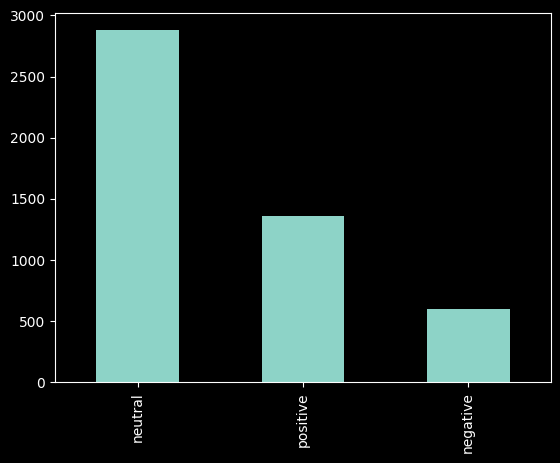

In [38]:
y.value_counts().plot.bar()

### Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### NB (Multinomial)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

steps = [('tfidf',TfidfVectorizer()),
         ('mnb', MultinomialNB(alpha=1e-03))]

# alpha=1e-04
         
mnb_pipeline = Pipeline(steps)
mnb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('mnb', MultinomialNB(alpha=0.001))])

In [41]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

ypred_test = mnb_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test) 
report_clf = classification_report(y_test, ypred_test) 

print(mat_clf)
print(report_clf)

[[ 85  77  29]
 [ 31 796 114]
 [ 43 207 217]]
              precision    recall  f1-score   support

    negative       0.53      0.45      0.49       191
     neutral       0.74      0.85      0.79       941
    positive       0.60      0.46      0.52       467

    accuracy                           0.69      1599
   macro avg       0.62      0.59      0.60      1599
weighted avg       0.67      0.69      0.67      1599

